In [ ]:
##                         Lead Scoring Case Study - Problem Statement     

In [ ]:
##An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

#The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

#Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.
#  There are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

 
# Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

In [ ]:
## Goals of the Case Study
# To build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. 
# A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [ ]:
# Solution
  1. Reading the dataset from csv
        • Conversion of data into dataframe
        • Examining the dataframe
  2. Data Cleaning
        • Replacing "Select" as NULL values
        • Calculating the percentage of null values in each column
        • Removing/Dropping of columns whose percentage of null values greater than 25%
        • Checking the dimensions of the dataframe after removing 25% null values columns
        • Checking columns whose null values percentages are less than 25%
        • Handling Missing values:
                A.Seggregation of numerical and categorical column
                B.Imputation on numerical and categorical column
        • Checking for any other null values in the dataframe.
        • Removing unwanted columns
                A.Removing columns that do not give relevant information
                B.Removing columns which have only one unique value
  3.Exploratory Data Analysis
        • Checking Data Imbalance percentage and Lead Converted Ratio
        • Univariate Analysis
                A.Categorical columns
                B.Numerical columns
        • Bivariate Analysis for numerical variables.
  4. Data Preparation   
        • Mapping of binary categorical variables
        • Checking the datatypes of columns
        • Creation of dummy variables
  5.Splitting of Train and Test set
  6.Scaling of features
  7.Model Building Using Statsmodel and RFE
  8.Model Evaluation for Train set 
        • Obtaining predicted value on y_train set
        • Creating a dataframe with the actual converted flag and predicted probabilities 
        • Creating a threshold value for the new column "predicted"
        • Creating Confusion matrix
                A.Accuracy
                B.Sensitivity
                C.Specificity
                D.False positive rate
                E.Positive predictive value
                F.Negative predictive value
                G.Precision
                H.Recall
        • Plotting the RoC curve
        • Determining optimal cut-off point or probability
        • Model evaluation after obtaining optimal cut-off point or probability method
        • Model Evaluation using Precision-Recall Trade off method
        • Comparing the metrics values from Optimal cut-off point method and Precision-Recall Trade off method
  9.Model Evaluation for Test set
        • Prediction on Test Dataset
        • Test model Evaluation
        • Comparision of train set and Test set values
        • Adding Lead_Score to test data
  10. Results
        • Metrics Value
        • Hot leads
        • Prospect ID of the customers
        • Features of the model

In [ ]:
### 1. Import all libraries, read and clean the input data, and carrying out EDA

In [302]:
#importing all libraries
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.preprocessing import StandardScaler


In [303]:
#changing pandas setting to increase display max_rows and max_columns
pd.set_option("display.max_rows",100)
pd.set_option("display.max_columns",50)

In [304]:
#reading the file csv file
leads_df = pd.read_csv("C:\\Users\\ersap\\OneDrive\\Desktop\\python\\LeadScoreCaseStudy\\Sapna\\Leads.csv")

In [305]:
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [306]:
leads_df.shape

(9240, 37)

In [307]:
leads_df.info()
#All Data type looks correct with no gaps in types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [308]:
# Checking the summary of numerical columns
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [309]:
# Checking unique values in each column
leads_df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [310]:
#Prospect ID and Lead Number are same and uniquue, one can be dropped
leads_df.drop(columns=['Prospect ID'],axis=1,inplace=True)

In [311]:
# check % null values
round(leads_df.isnull().sum() / leads_df.shape[0] *100 ,2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [312]:
#All column with  more than 40% null values can be dropped
leads_df.drop(columns=['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score',
                      'Lead Quality'],axis=1,inplace=True)

In [313]:
# Replace all Select values in the categorical variables with NaN , as there are multiple with Select values
leads_df.replace({'Select': np.NaN},inplace =True)

In [314]:
# check % null values again
round(leads_df.isnull().sum() / leads_df.shape[0] *100 ,2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [315]:
# drop columns that are  nulls > 25%
leads_df.drop(columns=['How did you hear about X Education','Lead Profile',
                      'Specialization','What is your current occupation',
                       'What matters most to you in choosing a course','Tags','City','Country'],axis=1, inplace=True)

In [316]:
# check % null values again
round(leads_df.isnull().sum() / leads_df.shape[0] *100 ,2)

Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Update me on Supply Chain Content           0.00
Get updates on DM Content                   0.00
I agree to pay the a

In [317]:
#checking percentages of null value in every column where TotalVisits is null
leads_df[leads_df.TotalVisits.isna()].isnull().sum()*100/len(leads_df[leads_df.TotalVisits.isna()])

Lead Number                                   0.000000
Lead Origin                                   0.000000
Lead Source                                   5.109489
Do Not Email                                  0.000000
Do Not Call                                   0.000000
Converted                                     0.000000
TotalVisits                                 100.000000
Total Time Spent on Website                   0.000000
Page Views Per Visit                        100.000000
Last Activity                                75.182482
Search                                        0.000000
Magazine                                      0.000000
Newspaper Article                             0.000000
X Education Forums                            0.000000
Newspaper                                     0.000000
Digital Advertisement                         0.000000
Through Recommendations                       0.000000
Receive More Updates About Our Courses        0.000000
Update me 

In [318]:
#When TotalVisits is null, 'Page Views Per Visit' :100% and 'Last Activity' : 75%  null
#dropping rows where TotalVisits is null
leads_df=leads_df[leads_df.TotalVisits.notna()]

In [319]:
# check % null values again
round(leads_df.isnull().sum() / leads_df.shape[0] *100 ,2)

Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.32
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 0.00
Total Time Spent on Website                 0.00
Page Views Per Visit                        0.00
Last Activity                               0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Update me on Supply Chain Content           0.00
Get updates on DM Content                   0.00
I agree to pay the a

In [320]:
leads_df['Lead Source'].value_counts()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [321]:
leads_df["Lead Source"]=leads_df["Lead Source"].replace("google","Google")

In [322]:
leads_df['Lead Source'].value_counts()

Lead Source
Google               2873
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: count, dtype: int64

In [323]:
# check % null values again
round(leads_df.isnull().sum() / leads_df.shape[0] *100 ,2)

Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.32
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 0.00
Total Time Spent on Website                 0.00
Page Views Per Visit                        0.00
Last Activity                               0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Update me on Supply Chain Content           0.00
Get updates on DM Content                   0.00
I agree to pay the a

In [324]:
# Impute Missing values with mode value for Lead Source 
leads_df["Lead Source"].fillna(leads_df["Lead Source"].mode()[0],inplace=True)

In [325]:
# check % null values again
round(leads_df.isnull().sum() / leads_df.shape[0] *100 ,2)

Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content                   0.0
I agree to pay the amount through cheque

In [326]:
### Mapping of binary categorical variables

In [327]:
# List of variables to map Yes/No to binary 1/0 respectively

varlist =  ['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
           'Update me on Supply Chain Content','Get updates on DM Content',
           'I agree to pay the amount through cheque','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads_df[varlist] = leads_df[varlist].apply(binary_map)

In [328]:
leads_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,0,0,0,0,0,0,0,0,0,0,0,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,0,0,0,0,0,0,0,0,0,0,0,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,0,0,0,0,0,0,0,0,0,0,0,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,0,0,0,0,0,0,0,0,0,0,0,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,0,0,0,0,0,0,0,0,0,0,0,0,Modified


In [329]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Number                               9103 non-null   int64  
 1   Lead Origin                               9103 non-null   object 
 2   Lead Source                               9103 non-null   object 
 3   Do Not Email                              9103 non-null   int64  
 4   Do Not Call                               9103 non-null   int64  
 5   Converted                                 9103 non-null   int64  
 6   TotalVisits                               9103 non-null   float64
 7   Total Time Spent on Website               9103 non-null   int64  
 8   Page Views Per Visit                      9103 non-null   float64
 9   Last Activity                             9103 non-null   object 
 10  Search                                   

In [330]:
## 3. Exploratory Data Analysis

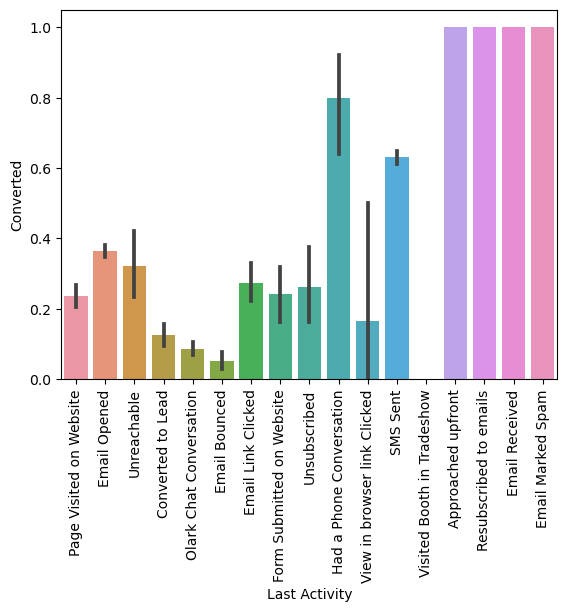

In [331]:
# Check Lead Origin
sns.barplot(x = "Last Activity", y = 'Converted', data = leads_df)
plt.xticks(rotation = 90)
plt.show()

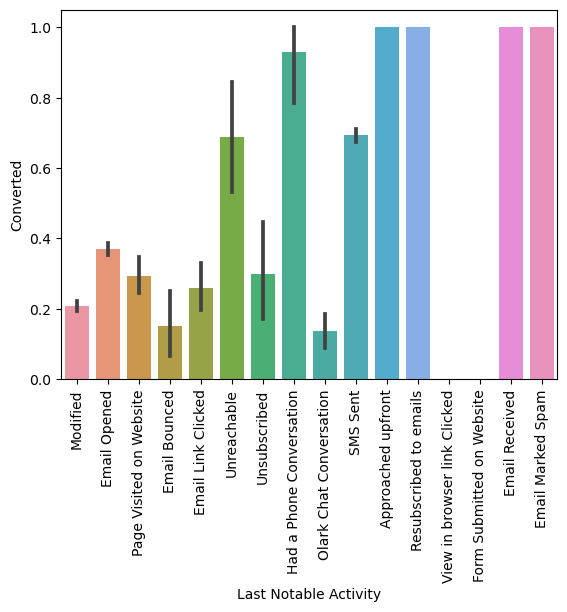

In [332]:
# Check Lead Origin
sns.barplot(x = "Last Notable Activity", y = 'Converted', data = leads_df)
plt.xticks(rotation = 90)
plt.show()

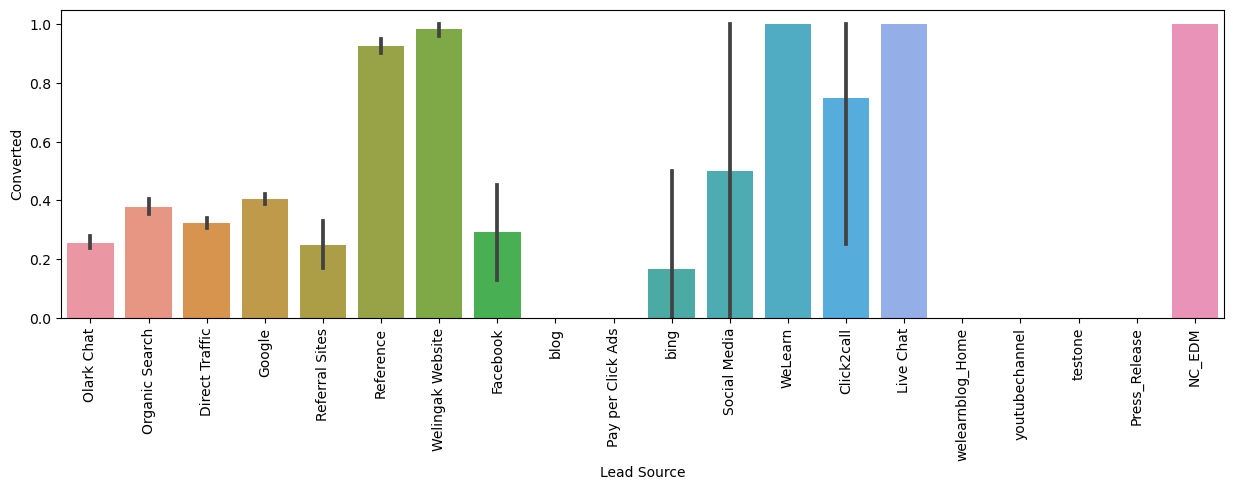

In [333]:
# Check Lead Source

plt.figure(figsize=(15,4))
sns.barplot(x = "Lead Source", y = 'Converted', data = leads_df)
plt.xticks(rotation = 90)
plt.show()


In [334]:
leads_df["Lead Source"].value_counts()

Lead Source
Google               2902
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: count, dtype: int64

In [335]:
#Merge many similar value in to Others
leads_df["Lead Source"]=leads_df["Lead Source"].replace(["blog","Pay per Click Ads","Social Media","WeLearn","Click2call","Live Chat","welearnblog_Home","youtubechannel","testone","Press_Release","NC_EDM","bing"],"Others")

In [336]:
leads_df["Lead Source"].value_counts()

Lead Source
Google              2902
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Facebook              31
Others                23
Name: count, dtype: int64

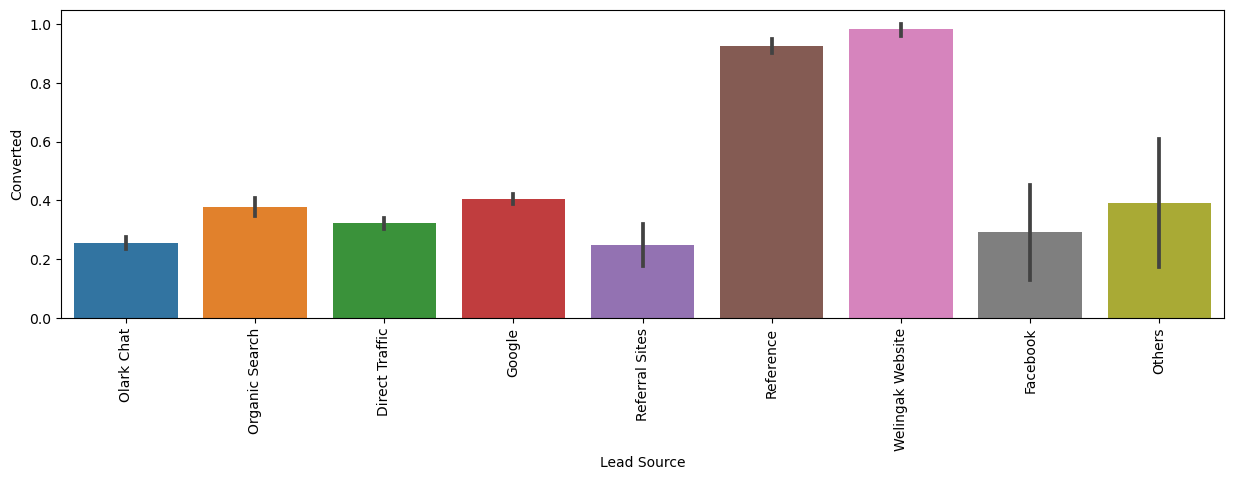

In [337]:
#show new plot Lead Source
plt.figure(figsize=(15,4))
sns.barplot(x = "Lead Source", y = 'Converted', data = leads_df)
plt.xticks(rotation = 90)
plt.show()


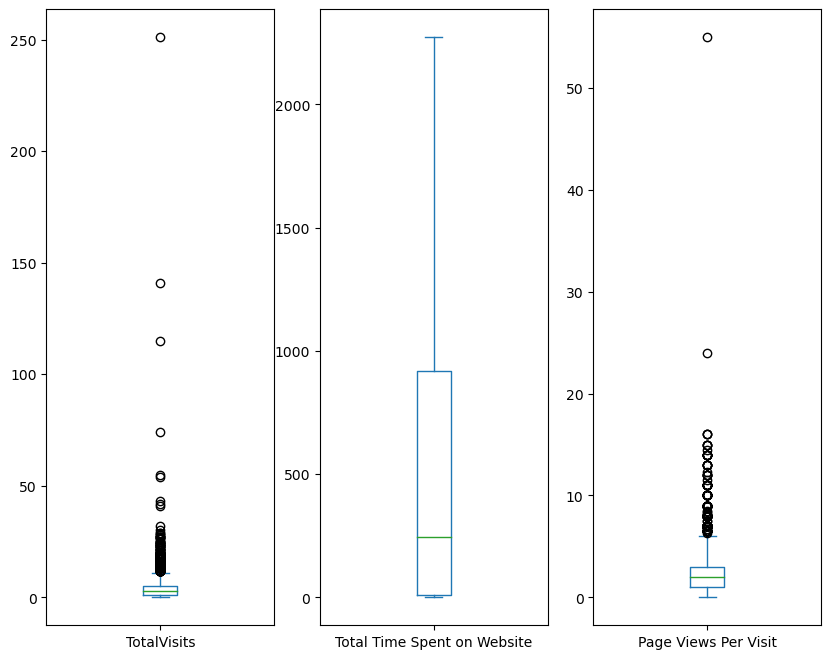

In [338]:
#check for outliers in numeric columns
num_cols=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

plt.figure(figsize = (10,8))   
for i in range(len(num_cols)):
    plt.subplot(1,3,i+1)
    leads_df[num_cols[i]].plot(kind="box")

In [339]:
#drop all outliers :  'TotalVisits' and 'Page Views Per Visit'
leads_df=leads_df[leads_df["Page Views Per Visit"]<20]
leads_df=leads_df[leads_df["TotalVisits"]<55]

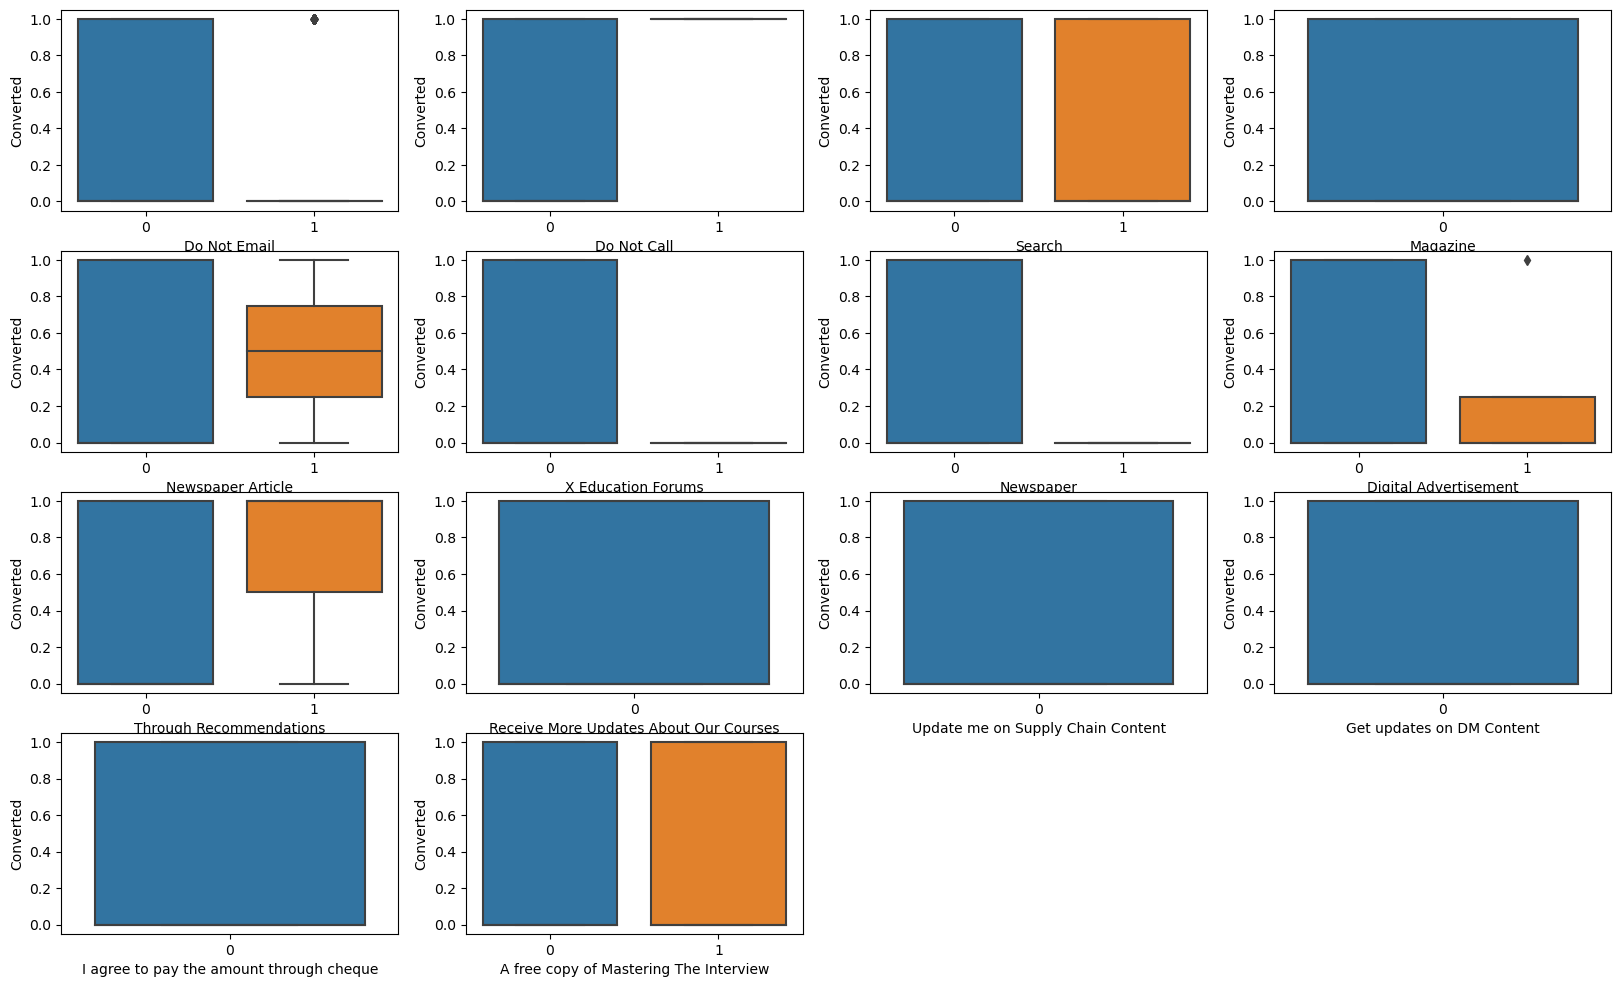

In [340]:
#Bi varate analysi target variable (Converted) with other Categorical Columns (Yes and NO)
plt.figure(figsize=(20, 12))
for i in range(len(varlist)):
    plt.subplot(4,4,i+1)
    sns.boxplot(x = varlist[i], y = 'Converted', data = leads_df)

In [341]:
#dropping all Yes/NO  columns which shows no variance with the Target variable : Converted
leads_df.drop(columns=["Magazine","Receive More Updates About Our Courses",
          "Update me on Supply Chain Content","Get updates on DM Content",
           "I agree to pay the amount through cheque"],inplace=True)

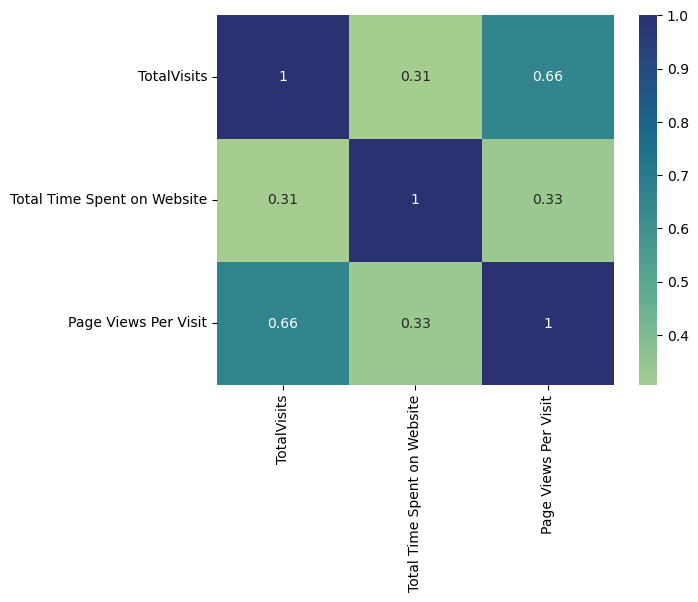

In [342]:
#Heatmap to show the correlation between numerical variables
sns.heatmap(data=leads_df[num_cols].corr(),cmap="crest",annot=True)
plt.show()

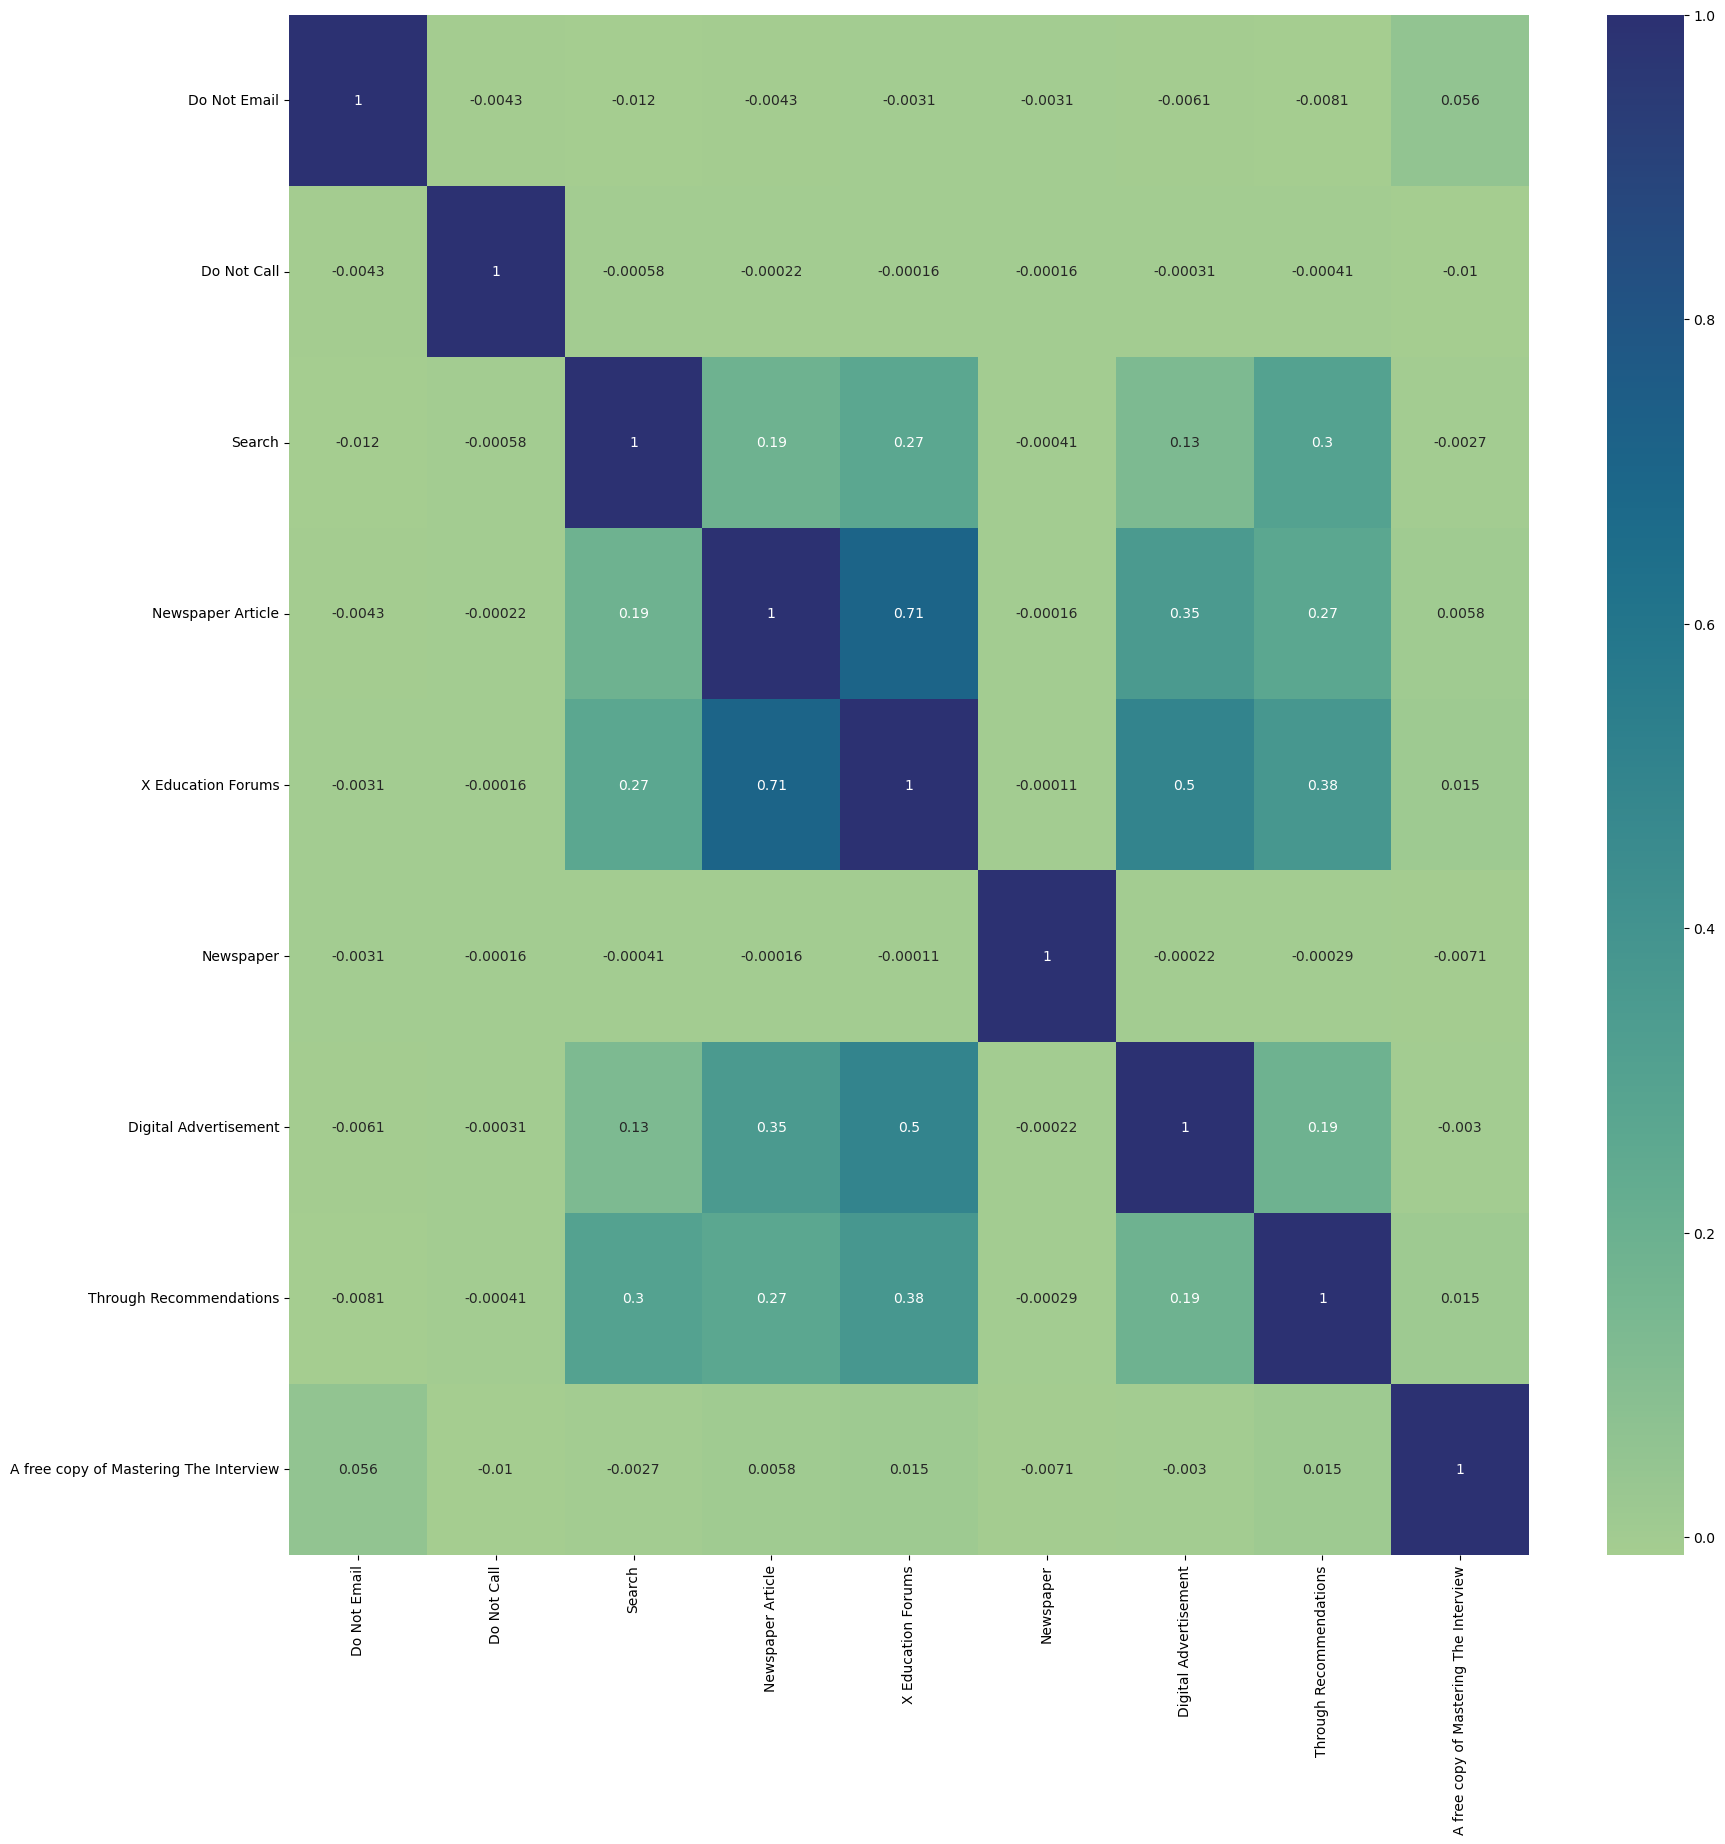

In [343]:
varlist =  ['Do Not Email','Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

#Heatmap to show the correlation between numerical variables
plt.figure(figsize=(20, 20))

sns.heatmap(data=leads_df[varlist].corr(),cmap="crest",annot=True)
plt.show()

#There is a correlation betwenn Newspaper article and XEducation Forums

In [344]:
# Get Dummy variables

In [345]:
leads_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,0,0,0,0,0,0,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,0,0,0,0,0,0,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,0,0,0,0,0,0,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,0,0,0,0,0,0,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,0,0,0,0,0,0,0,Modified


In [346]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy=pd.get_dummies(leads_df[['Lead Origin', 'Lead Source', 'Last Activity', 'Last Notable Activity']], dtype='int',drop_first=True)
dummy

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9236,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9237,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9238,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [347]:
# Adding the results to the master dataframe
leads_df = pd.concat([leads_df, dummy], axis=1)

In [348]:
#drop the columns for which dummies have been created
leads_df.drop(columns=['Lead Origin', 'Lead Source', 'Last Activity', 'Last Notable Activity'],inplace=True)

In [349]:
leads_df.columns

Index(['Lead Number', 'Do Not Email', 'Do Not Call', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Act

In [350]:
leads_df.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,0,0,1,2.0,1532,2.0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,0,1.0,305,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,660681,0,0,1,2.0,1428,1.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [351]:
### 2. Train-Test Split

In [352]:
#Feature variable in X
X = leads_df.drop(['Converted'], axis=1)
X.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,0,0,2.0,1532,2.0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,1.0,305,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,660681,0,0,2.0,1428,1.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [353]:
#Putting Converted variable in y
y = leads_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [454]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [455]:
### 3. Feature Scaling

In [456]:
#import StandardScaler library to scale numeric columns
scaler=StandardScaler()

In [457]:
X_train.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1962,640629,0,0,5.0,169,2.50,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1566,643916,0,0,14.0,1241,3.50,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9151,580278,0,0,7.0,133,7.00,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6863,597017,0,0,5.0,858,1.67,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6236,601921,0,0,0.0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [458]:
#scaling the numeric columns
scale_cols=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])

X_train.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1962,640629,0,0,0.480164,-0.555005,0.088937,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1566,643916,0,0,3.073699,1.424522,0.577487,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9151,580278,0,0,1.056505,-0.621481,2.287415,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6863,597017,0,0,0.480164,0.717284,-0.316560,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6236,601921,0,0,-0.960689,-0.867076,-1.132440,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [459]:
# Checking the Conversion Rate : 38.02%
conversion_rate = (sum(leads_df['Converted'])/len(leads_df['Converted'].index))*100
conversion_rate

38.02352423876003

In [460]:
#import LogisticRegression library from sklearn package for feature selection using RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [461]:
#Carrying on feature selection using RFE
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [462]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', True, 1),
 ('Do Not Email', True, 1),
 ('Do Not Call', False, 20),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 9),
 ('Search', False, 24),
 ('Newspaper Article', False, 32),
 ('X Education Forums', False, 30),
 ('Newspaper', False, 29),
 ('Digital Advertisement', False, 28),
 ('Through Recommendations', False, 17),
 ('A free copy of Mastering The Interview', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 19),
 ('Lead Source_Facebook', False, 18),
 ('Lead Source_Google', False, 6),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 2),
 ('Lead Source_Others', False, 27),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 7),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity

In [463]:
#getting list of top 20 features returned by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Lead Number', 'Do Not Email', 'TotalVisits',
       'Total Time Spent on Website', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [464]:
#getting list of top 20 features returned by RFE
non_cols = X_train.columns[~rfe.support_]
non_cols

Index(['Do Not Call', 'Page Views Per Visit', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Referral Sites', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Resubscribed to emails', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Marked Spam',
       'Last Notable Activity_Email Received',
       'Last Notable Activ

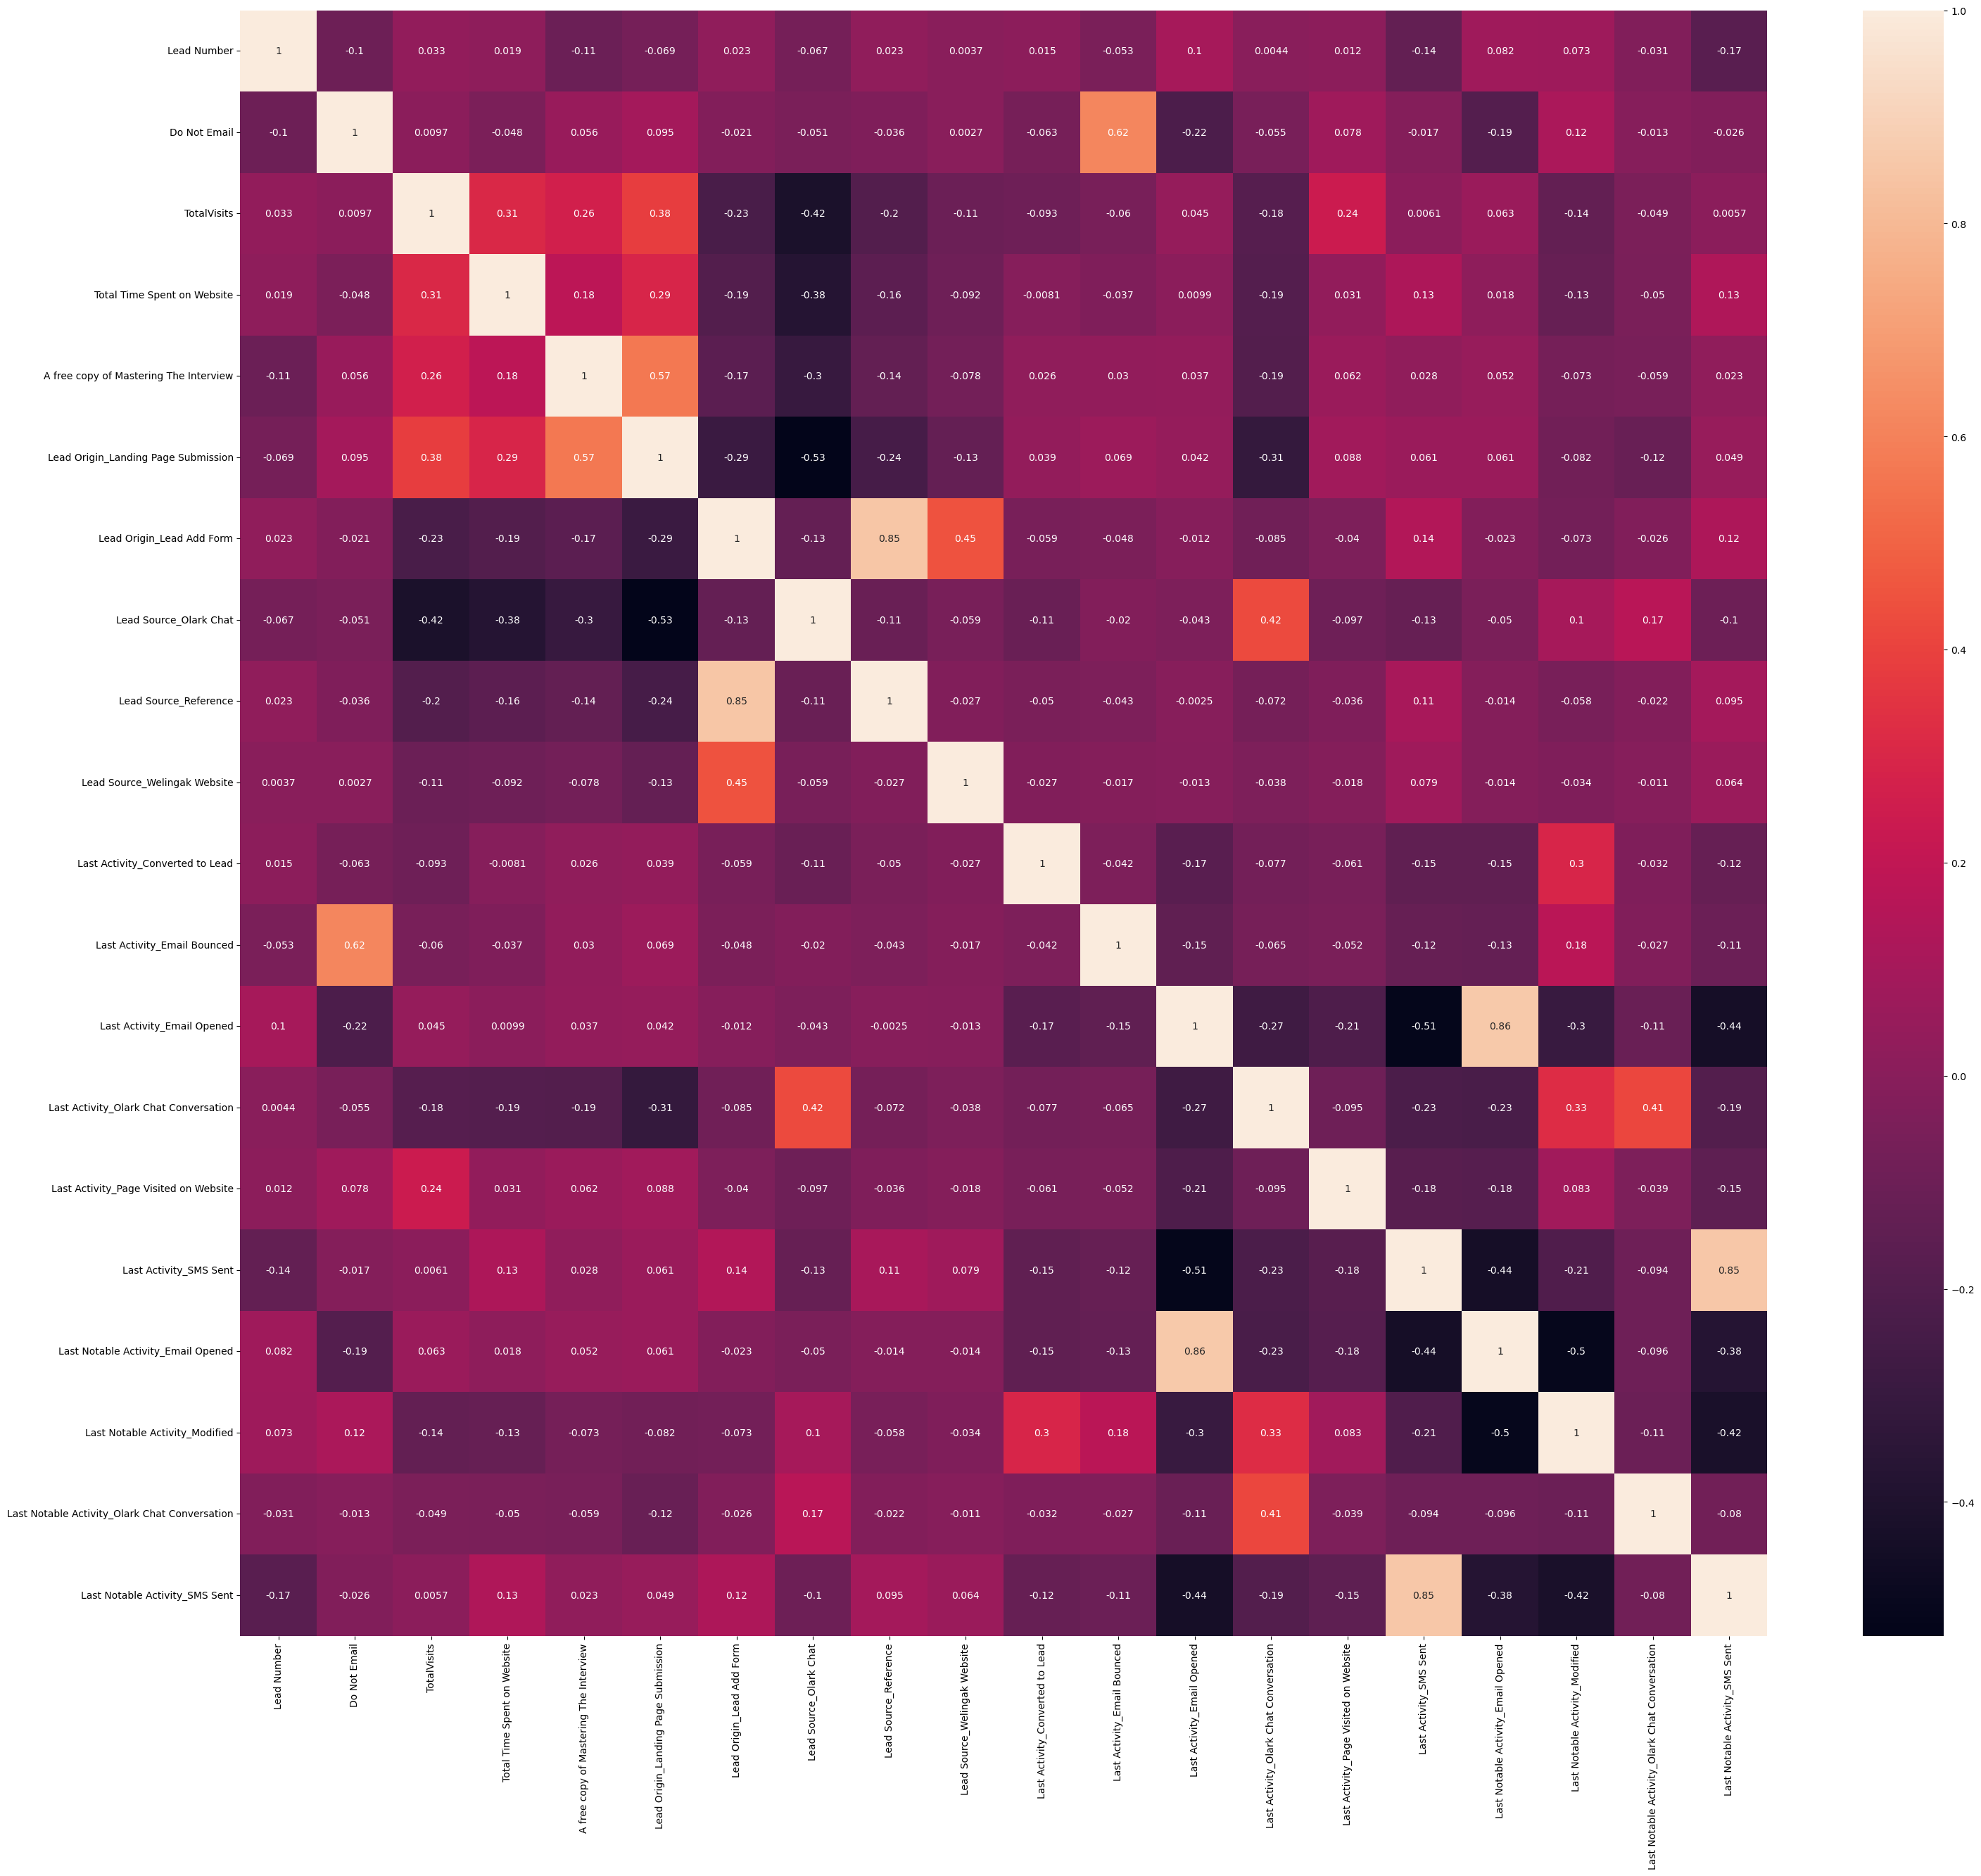

In [465]:
### 5. Check correlations on selected columns
X_train = X_train[cols]
plt.figure(figsize = (35,30))        # Size of the figure
sns.heatmap(leads_df[cols].corr(),annot = True)
plt.show()

In [466]:
X_train.drop(columns=["Lead Number"], axis=1, inplace=True)

In [467]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6367 entries, 1962 to 5738
Data columns (total 19 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Do Not Email                                   6367 non-null   int64  
 1   TotalVisits                                    6367 non-null   float64
 2   Total Time Spent on Website                    6367 non-null   float64
 3   A free copy of Mastering The Interview         6367 non-null   int64  
 4   Lead Origin_Landing Page Submission            6367 non-null   int32  
 5   Lead Origin_Lead Add Form                      6367 non-null   int32  
 6   Lead Source_Olark Chat                         6367 non-null   int32  
 7   Lead Source_Reference                          6367 non-null   int32  
 8   Lead Source_Welingak Website                   6367 non-null   int32  
 9   Last Activity_Converted to Lead                6367 no

In [468]:
### Model-1

In [469]:
#Adding a constant variable
X_train_sm=sm.add_constant(X_train)
#Fitting the model
logm1=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()
#Summary
logm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6367
Model:                            GLM   Df Residuals:                     6347
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2800.0
Date:                Tue, 28 May 2024   Deviance:                       5600.0
Time:                        07:53:56   Pearson chi2:                 6.58e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3581
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.7945      0.170     -4.665      0.000      -1.128      -0.461
Do Not Email                                     -1.1188      0.185     -6.045      0.000      -1.481      -0.756
TotalVisits                                       0.1921      0.039      4.911      0.000       0.115       0.269
Total Time Spent on Website                       1.0715      0.038     27.874      0.000       0.996       1.147
A free copy of Mastering The Interview           -0.2370      0.084     -2.811      0.005      -0.402      -0.072
Lead Origin_Landing Page Submission              -0.1452      0.096     -1.518      0.129      -0.333       0.042
Lead Origin_Lead Add Form                         3.7233      0.645      5.771      0.000       2.459       4.988
Lead Source_Olark Chat                            0.9737      0.122      8.001      0.000       0.735       1.212
Lead Source_Reference                             0.4162      0.673      0.619      0.536      -0.902       1.735
Lead Source_Welingak Website                      2.5959      1.195      2.172      0.030       0.254       4.938
Last Activity_Converted to Lead                  -0.7903      0.251     -3.155      0.002      -1.281      -0.299
Last Activity_Email Bounced                      -0.8554      0.391     -2.187      0.029      -1.622      -0.089
Last Activity_Email Opened                        0.1476      0.201      0.734      0.463      -0.246       0.541
Last Activity_Olark Chat Conversation            -1.2754      0.236     -5.400      0.000      -1.738      -0.812
Last Activity_Page Visited on Website            -0.6029      0.187     -3.224      0.001      -0.969      -0.236
Last Activity_SMS Sent                            0.4964      0.200      2.478      0.013       0.104       0.889
Last Notable Activity_Email Opened               -0.2518      0.227     -1.110      0.267      -0.696       0.193
Last Notable Activity_Modified                   -0.5843      0.180     -3.242      0.001      -0.938      -0.231
Last Notable Activity_Olark Chat Conversation    -0.3075      0.379     -0.812      0.417      -1.050       0.435
Last Notable Activity_SMS Sent                    0.8110      0.230      3.533      0.000       0.361       1.261
=================================================================================================================
"""

In [470]:
# Let's check the VIFs
col=X_train.columns.to_list()
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Lead Origin_Lead Add Form,16.09
11,Last Activity_Email Opened,12.50
7,Lead Source_Reference,12.15
15,Last Notable Activity_Email Opened,11.79
14,Last Activity_SMS Sent,9.96
18,Last Notable Activity_SMS Sent,9.05
16,Last Notable Activity_Modified,6.76
8,Lead Source_Welingak Website,4.55
4,Lead Origin_Landing Page Submission,4.30
12,Last Activity_Olark Chat Conversation,3.47


In [471]:
#Drop column with HIgh P value and recalculate
X_train.drop(columns=['Lead Source_Reference'],inplace=True)


In [472]:
# Logistic regression model 2
logm2 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6367
Model:                            GLM   Df Residuals:                     6348
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2800.2
Date:                Tue, 28 May 2024   Deviance:                       5600.4
Time:                        07:54:00   Pearson chi2:                 6.57e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3581
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.7962      0.170     -4.674      0.000      -1.130      -0.462
Do Not Email                                     -1.1266      0.185     -6.086      0.000      -1.489      -0.764
TotalVisits                                       0.1921      0.039      4.910      0.000       0.115       0.269
Total Time Spent on Website                       1.0714      0.038     27.872      0.000       0.996       1.147
A free copy of Mastering The Interview           -0.2367      0.084     -2.809      0.005      -0.402      -0.072
Lead Origin_Landing Page Submission              -0.1453      0.096     -1.519      0.129      -0.333       0.042
Lead Origin_Lead Add Form                         4.1026      0.225     18.219      0.000       3.661       4.544
Lead Source_Olark Chat                            0.9735      0.122      7.998      0.000       0.735       1.212
Lead Source_Welingak Website                      2.2171      1.031      2.150      0.032       0.196       4.239
Last Activity_Converted to Lead                  -0.7915      0.250     -3.160      0.002      -1.282      -0.301
Last Activity_Email Bounced                      -0.8484      0.391     -2.169      0.030      -1.615      -0.082
Last Activity_Email Opened                        0.1467      0.201      0.731      0.465      -0.247       0.540
Last Activity_Olark Chat Conversation            -1.2760      0.236     -5.405      0.000      -1.739      -0.813
Last Activity_Page Visited on Website            -0.6014      0.187     -3.217      0.001      -0.968      -0.235
Last Activity_SMS Sent                            0.4965      0.200      2.479      0.013       0.104       0.889
Last Notable Activity_Email Opened               -0.2489      0.227     -1.097      0.272      -0.693       0.196
Last Notable Activity_Modified                   -0.5815      0.180     -3.227      0.001      -0.935      -0.228
Last Notable Activity_Olark Chat Conversation    -0.3039      0.379     -0.802      0.422      -1.046       0.438
Last Notable Activity_SMS Sent                    0.8126      0.230      3.541      0.000       0.363       1.262
=================================================================================================================
"""

In [473]:
#Drop column with HIgh P value and recalculate
X_train.drop(columns=['Last Activity_Email Opened'],inplace=True)


In [474]:
# Logistic regression model 3
logm3 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6367
Model:                            GLM   Df Residuals:                     6349
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2800.5
Date:                Tue, 28 May 2024   Deviance:                       5600.9
Time:                        07:54:10   Pearson chi2:                 6.57e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3580
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.7659      0.165     -4.649      0.000      -1.089      -0.443
Do Not Email                                     -1.1343      0.185     -6.144      0.000      -1.496      -0.772
TotalVisits                                       0.1921      0.039      4.910      0.000       0.115       0.269
Total Time Spent on Website                       1.0714      0.038     27.874      0.000       0.996       1.147
A free copy of Mastering The Interview           -0.2361      0.084     -2.802      0.005      -0.401      -0.071
Lead Origin_Landing Page Submission              -0.1478      0.096     -1.546      0.122      -0.335       0.040
Lead Origin_Lead Add Form                         4.1033      0.225     18.222      0.000       3.662       4.545
Lead Source_Olark Chat                            0.9730      0.122      7.992      0.000       0.734       1.212
Lead Source_Welingak Website                      2.2237      1.031      2.156      0.031       0.202       4.245
Last Activity_Converted to Lead                  -0.8788      0.220     -4.001      0.000      -1.309      -0.448
Last Activity_Email Bounced                      -0.9091      0.382     -2.383      0.017      -1.657      -0.161
Last Activity_Olark Chat Conversation            -1.3642      0.202     -6.740      0.000      -1.761      -0.967
Last Activity_Page Visited on Website            -0.6556      0.171     -3.835      0.000      -0.991      -0.320
Last Activity_SMS Sent                            0.4096      0.160      2.553      0.011       0.095       0.724
Last Notable Activity_Email Opened               -0.1312      0.160     -0.822      0.411      -0.444       0.182
Last Notable Activity_Modified                   -0.5231      0.161     -3.252      0.001      -0.838      -0.208
Last Notable Activity_Olark Chat Conversation    -0.2453      0.370     -0.663      0.507      -0.970       0.480
Last Notable Activity_SMS Sent                    0.8711      0.215      4.058      0.000       0.450       1.292
=================================================================================================================
"""

In [475]:
#Drop column with HIgh P value and recalculate
X_train.drop(columns=['Last Notable Activity_Olark Chat Conversation'],inplace=True)


In [476]:
# Logistic regression model 4
logm4 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6367
Model:                            GLM   Df Residuals:                     6350
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2800.7
Date:                Tue, 28 May 2024   Deviance:                       5601.4
Time:                        07:54:18   Pearson chi2:                 6.58e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3580
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.7999      0.157     -5.098      0.000      -1.107      -0.492
Do Not Email                              -1.1301      0.184     -6.129      0.000      -1.491      -0.769
TotalVisits                                0.1926      0.039      4.924      0.000       0.116       0.269
Total Time Spent on Website                1.0700      0.038     27.890      0.000       0.995       1.145
A free copy of Mastering The Interview    -0.2369      0.084     -2.812      0.005      -0.402      -0.072
Lead Origin_Landing Page Submission       -0.1485      0.096     -1.554      0.120      -0.336       0.039
Lead Origin_Lead Add Form                  4.0989      0.225     18.213      0.000       3.658       4.540
Lead Source_Olark Chat                     0.9723      0.122      7.985      0.000       0.734       1.211
Lead Source_Welingak Website               2.2202      1.031      2.153      0.031       0.199       4.242
Last Activity_Converted to Lead           -0.8899      0.219     -4.066      0.000      -1.319      -0.461
Last Activity_Email Bounced               -0.9090      0.381     -2.385      0.017      -1.656      -0.162
Last Activity_Olark Chat Conversation     -1.4322      0.177     -8.089      0.000      -1.779      -1.085
Last Activity_Page Visited on Website     -0.6418      0.169     -3.787      0.000      -0.974      -0.310
Last Activity_SMS Sent                     0.3976      0.159      2.496      0.013       0.085       0.710
Last Notable Activity_Email Opened        -0.0961      0.151     -0.637      0.524      -0.392       0.200
Last Notable Activity_Modified            -0.4760      0.145     -3.294      0.001      -0.759      -0.193
Last Notable Activity_SMS Sent             0.9177      0.203      4.523      0.000       0.520       1.315
==========================================================================================================
"""

In [477]:
#Drop column with HIgh P value and recalculate
X_train.drop(columns=['Last Notable Activity_Email Opened'],inplace=True)


In [478]:
# Logistic regression model 4
logm4 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6367
Model:                            GLM   Df Residuals:                     6351
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2800.9
Date:                Tue, 28 May 2024   Deviance:                       5601.8
Time:                        07:54:20   Pearson chi2:                 6.58e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3579
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.8844      0.084    -10.510      0.000      -1.049      -0.719
Do Not Email                              -1.1172      0.183     -6.097      0.000      -1.476      -0.758
TotalVisits                                0.1943      0.039      4.978      0.000       0.118       0.271
Total Time Spent on Website                1.0704      0.038     27.907      0.000       0.995       1.146
A free copy of Mastering The Interview    -0.2363      0.084     -2.806      0.005      -0.401      -0.071
Lead Origin_Landing Page Submission       -0.1499      0.096     -1.569      0.117      -0.337       0.037
Lead Origin_Lead Add Form                  4.1050      0.225     18.248      0.000       3.664       4.546
Lead Source_Olark Chat                     0.9772      0.122      8.039      0.000       0.739       1.215
Lead Source_Welingak Website               2.2210      1.032      2.153      0.031       0.199       4.243
Last Activity_Converted to Lead           -0.8705      0.217     -4.014      0.000      -1.296      -0.445
Last Activity_Email Bounced               -0.8811      0.378     -2.329      0.020      -1.623      -0.140
Last Activity_Olark Chat Conversation     -1.3973      0.168     -8.299      0.000      -1.727      -1.067
Last Activity_Page Visited on Website     -0.5897      0.148     -3.976      0.000      -0.880      -0.299
Last Activity_SMS Sent                     0.4145      0.157      2.636      0.008       0.106       0.723
Last Notable Activity_Modified            -0.4100      0.101     -4.063      0.000      -0.608      -0.212
Last Notable Activity_SMS Sent             0.9841      0.174      5.646      0.000       0.643       1.326
==========================================================================================================
"""

In [479]:
#Drop column with HIgh P value and recalculate
X_train.drop(columns=['Lead Origin_Landing Page Submission'],inplace=True)


In [480]:
# Logistic regression model 5
logm5 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6367
Model:                            GLM   Df Residuals:                     6352
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2802.1
Date:                Tue, 28 May 2024   Deviance:                       5604.2
Time:                        07:54:33   Pearson chi2:                 6.58e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3577
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.9678      0.066    -14.737      0.000      -1.097      -0.839
Do Not Email                              -1.1233      0.183     -6.140      0.000      -1.482      -0.765
TotalVisits                                0.1907      0.039      4.892      0.000       0.114       0.267
Total Time Spent on Website                1.0703      0.038     27.904      0.000       0.995       1.145
A free copy of Mastering The Interview    -0.2934      0.076     -3.867      0.000      -0.442      -0.145
Lead Origin_Lead Add Form                  4.1871      0.219     19.123      0.000       3.758       4.616
Lead Source_Olark Chat                     1.0579      0.111      9.571      0.000       0.841       1.275
Lead Source_Welingak Website               2.2207      1.032      2.152      0.031       0.198       4.243
Last Activity_Converted to Lead           -0.8672      0.217     -3.995      0.000      -1.293      -0.442
Last Activity_Email Bounced               -0.8873      0.378     -2.345      0.019      -1.629      -0.146
Last Activity_Olark Chat Conversation     -1.3774      0.168     -8.204      0.000      -1.707      -1.048
Last Activity_Page Visited on Website     -0.5879      0.148     -3.963      0.000      -0.879      -0.297
Last Activity_SMS Sent                     0.4115      0.157      2.619      0.009       0.104       0.719
Last Notable Activity_Modified            -0.4090      0.101     -4.053      0.000      -0.607      -0.211
Last Notable Activity_SMS Sent             0.9824      0.174      5.640      0.000       0.641       1.324
==========================================================================================================
"""

In [481]:
#Drop column with HIgh P value and recalculate
X_train.drop(columns=['Lead Source_Welingak Website'],inplace=True)


In [482]:
# Logistic regression model 6
logm6 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm6.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6367
Model:                            GLM   Df Residuals:                     6353
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2806.7
Date:                Tue, 28 May 2024   Deviance:                       5613.3
Time:                        07:54:48   Pearson chi2:                 6.66e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3568
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.9678      0.066    -14.738      0.000      -1.097      -0.839
Do Not Email                              -1.1193      0.182     -6.138      0.000      -1.477      -0.762
TotalVisits                                0.1909      0.039      4.896      0.000       0.114       0.267
Total Time Spent on Website                1.0702      0.038     27.901      0.000       0.995       1.145
A free copy of Mastering The Interview    -0.2944      0.076     -3.880      0.000      -0.443      -0.146
Lead Origin_Lead Add Form                  4.4309      0.214     20.739      0.000       4.012       4.850
Lead Source_Olark Chat                     1.0575      0.111      9.568      0.000       0.841       1.274
Last Activity_Converted to Lead           -0.8591      0.217     -3.958      0.000      -1.284      -0.434
Last Activity_Email Bounced               -0.8500      0.371     -2.288      0.022      -1.578      -0.122
Last Activity_Olark Chat Conversation     -1.3695      0.168     -8.173      0.000      -1.698      -1.041
Last Activity_Page Visited on Website     -0.5862      0.148     -3.950      0.000      -0.877      -0.295
Last Activity_SMS Sent                     0.4248      0.157      2.709      0.007       0.117       0.732
Last Notable Activity_Modified            -0.4167      0.101     -4.128      0.000      -0.615      -0.219
Last Notable Activity_SMS Sent             0.9703      0.174      5.580      0.000       0.629       1.311
==========================================================================================================
"""

In [483]:
#Drop column with HIgh P value and recalculate
X_train.drop(columns=['Last Activity_Email Bounced'],inplace=True)


In [484]:
# Logistic regression model 7
logm7 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm7.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6367
Model:                            GLM   Df Residuals:                     6354
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2809.6
Date:                Tue, 28 May 2024   Deviance:                       5619.2
Time:                        07:55:02   Pearson chi2:                 6.65e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3562
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.9759      0.066    -14.871      0.000      -1.104      -0.847
Do Not Email                              -1.3420      0.159     -8.419      0.000      -1.654      -1.030
TotalVisits                                0.1941      0.039      4.980      0.000       0.118       0.271
Total Time Spent on Website                1.0700      0.038     27.906      0.000       0.995       1.145
A free copy of Mastering The Interview    -0.2940      0.076     -3.874      0.000      -0.443      -0.145
Lead Origin_Lead Add Form                  4.4572      0.214     20.870      0.000       4.039       4.876
Lead Source_Olark Chat                     1.0617      0.111      9.604      0.000       0.845       1.278
Last Activity_Converted to Lead           -0.8138      0.216     -3.763      0.000      -1.238      -0.390
Last Activity_Olark Chat Conversation     -1.3349      0.167     -7.990      0.000      -1.662      -1.007
Last Activity_Page Visited on Website     -0.5517      0.148     -3.726      0.000      -0.842      -0.261
Last Activity_SMS Sent                     0.4822      0.155      3.108      0.002       0.178       0.786
Last Notable Activity_Modified            -0.4526      0.100     -4.537      0.000      -0.648      -0.257
Last Notable Activity_SMS Sent             0.9341      0.173      5.387      0.000       0.594       1.274
==========================================================================================================
"""

In [485]:
# Let's check the VIFs
col=X_train.columns.to_list()
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Last Activity_SMS Sent,6.61
11,Last Notable Activity_SMS Sent,6.34
10,Last Notable Activity_Modified,2.57
5,Lead Source_Olark Chat,1.80
7,Last Activity_Olark Chat Conversation,1.73
1,TotalVisits,1.48
3,A free copy of Mastering The Interview,1.36
6,Last Activity_Converted to Lead,1.34
2,Total Time Spent on Website,1.28
4,Lead Origin_Lead Add Form,1.24


In [486]:
#Drop column with VIF Lead no and recalculate
X_train.drop(columns=['Last Activity_SMS Sent'],inplace=True)


In [487]:
# Logistic regression model 8
logm8 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm8.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6367
Model:                            GLM   Df Residuals:                     6355
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2814.4
Date:                Tue, 28 May 2024   Deviance:                       5628.7
Time:                        07:55:18   Pearson chi2:                 6.66e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3552
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.9685      0.066    -14.778      0.000      -1.097      -0.840
Do Not Email                              -1.3539      0.158     -8.547      0.000      -1.664      -1.043
TotalVisits                                0.1984      0.039      5.092      0.000       0.122       0.275
Total Time Spent on Website                1.0709      0.038     27.948      0.000       0.996       1.146
A free copy of Mastering The Interview    -0.2910      0.076     -3.837      0.000      -0.440      -0.142
Lead Origin_Lead Add Form                  4.4919      0.214     21.009      0.000       4.073       4.911
Lead Source_Olark Chat                     1.0581      0.110      9.581      0.000       0.842       1.275
Last Activity_Converted to Lead           -0.9704      0.210     -4.625      0.000      -1.382      -0.559
Last Activity_Olark Chat Conversation     -1.4460      0.163     -8.880      0.000      -1.765      -1.127
Last Activity_Page Visited on Website     -0.6325      0.145     -4.348      0.000      -0.918      -0.347
Last Notable Activity_Modified            -0.3035      0.086     -3.514      0.000      -0.473      -0.134
Last Notable Activity_SMS Sent             1.4083      0.083     16.962      0.000       1.246       1.571
==========================================================================================================
"""

In [488]:
# Let's check the VIFs
col=X_train.columns.to_list()
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Last Notable Activity_Modified,1.93
5,Lead Source_Olark Chat,1.80
7,Last Activity_Olark Chat Conversation,1.61
1,TotalVisits,1.47
3,A free copy of Mastering The Interview,1.36
10,Last Notable Activity_SMS Sent,1.28
2,Total Time Spent on Website,1.27
6,Last Activity_Converted to Lead,1.26
4,Lead Origin_Lead Add Form,1.23
8,Last Activity_Page Visited on Website,1.17


In [489]:
#logm8 is our final model which seems good to go with, let's fit it and move to prediction
logm8res = logm8.fit()
X_train_sm = sm.add_constant(X_train)
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [490]:
#Log 8 is final model with low value and low VIF
y_train_pred

array([0.14541288, 0.76256492, 0.49597295, ..., 0.34489998, 0.05846517,
       0.09983591])

In [491]:
#creating dataframe on predcitions by the model on train dataset
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.145413,1962
1,1,0.762565,1566
2,0,0.495973,9151
3,1,0.786370,6863
4,0,0.263166,6236


In [492]:
### 7. Plotting ROC Curve
#function to plot ROC
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [493]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

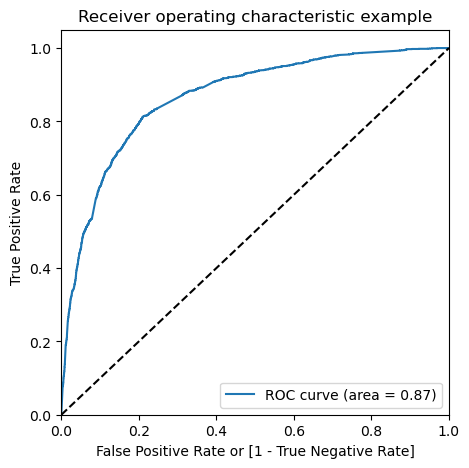

In [494]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [495]:
### 8. Finding Optimal Cut-off to measure Accuracy metrics of the model

In [496]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.145413,1962,1,1,0,0,0,0,0,0,0,0
1,1,0.762565,1566,1,1,1,1,1,1,1,1,0,0
2,0,0.495973,9151,1,1,1,1,1,0,0,0,0,0
3,1,0.786370,6863,1,1,1,1,1,1,1,1,0,0
4,0,0.263166,6236,1,1,1,0,0,0,0,0,0,0


In [497]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

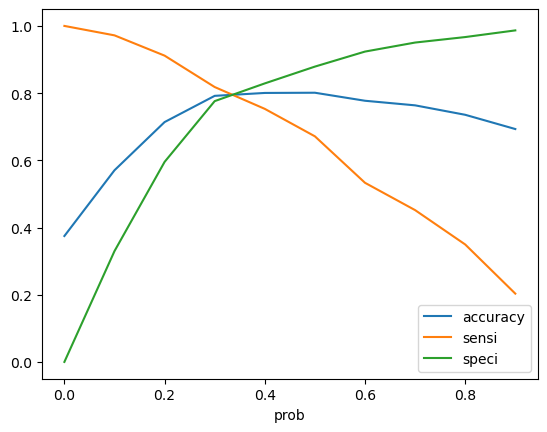

In [498]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [499]:
#### From above curve we could see 0.3 is the optimal cutoff

In [500]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.3 else 0)

# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7918957122663735

In [501]:
#Getting confusion matrix for the predictions made on train dataset
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [502]:
# Let's see the sensitivity and specificity of our logistic regression model
print("Sensitivity -",TP / float(TP+FN))
print("Specificty -",TN / float(TN+FP))

Sensitivity - 0.818105616093881
Specificty - 0.7761868877166541


In [503]:
# Calculate false postive rate , positive predcitive value and negative predictive value
print("False Positive Rate -",FP/ float(TN+FP))
print ("Positive Predicted Value -",TP / float(TP+FP))
print ("Negative Predicted Value -",TN / float(TN+ FN))

False Positive Rate - 0.22381311228334588
Positive Predicted Value - 0.6865986633837495
Negative Predicted Value - 0.876844494892168


In [504]:
#let's look into precision and recall
from sklearn.metrics import precision_score, recall_score

print("Precision Score -",precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))
print("Recall Score -",recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Precision Score - 0.6865986633837495
Recall Score - 0.818105616093881


<Axes: >

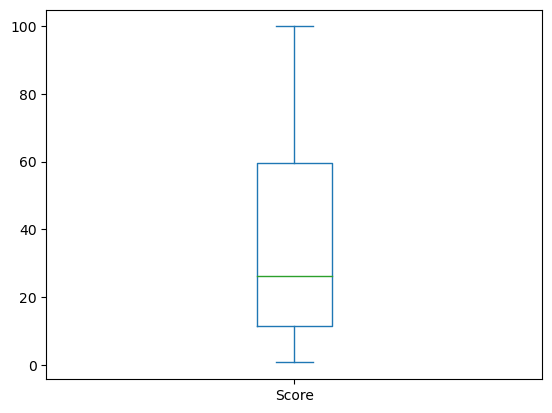

In [505]:
#getting the conversion score from probabilities
y_train_pred_final["Score"] = y_train_pred_final.Conversion_Prob.apply(lambda x: x*100)
y_train_pred_final["Score"].plot(kind="box")

In [506]:
### 9. Making predictions and calculating score on Test data


In [507]:
#scaling the numeric columns

X_test[scale_cols] = scaler.transform(X_test[scale_cols])
X_test.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2761,633132,0,0,-0.960689,-0.867076,-1.132440,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4048,621209,0,0,0.191993,1.721820,-0.155339,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8661,583663,0,0,0.191993,-0.311257,-0.155339,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1196,647285,0,0,0.191993,-0.085975,0.821763,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8217,587160,0,0,0.191993,-0.444210,0.821763,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [508]:
X_train.columns

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'A free copy of Mastering The Interview', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Last Activity_Converted to Lead',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [509]:
#Making predictions on test data
col=X_train.columns.to_list()
X_test_sm = sm.add_constant(X_test[col])
y_test_pred = logm8res.predict(X_test_sm)

In [510]:
# Converting y_pred to a dataframe which is an array
y_test_pred_1 = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting LeadID to index
y_test_df['LeadID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred_1
y_pred_final = pd.concat([y_test_df, y_test_pred_1],axis=1)

In [511]:
y_pred_final.head()

,Converted,LeadID,0
0,0,2761,0.058465
1,1,4048,0.883986
2,0,8661,0.134913
3,0,1196,0.211902
4,0,8217,0.500550


In [512]:
#renaming and rearranging the columns
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})
y_pred_final = y_pred_final.reindex(['LeadID','Converted','Conversion_Prob'], axis=1)
y_pred_final.head()

,LeadID,Converted,Conversion_Prob
0,2761,0,0.058465
1,4048,1,0.883986
2,8661,0,0.134913
3,1196,0,0.211902
4,8217,0,0.500550


In [513]:
#applying the optimum cutoff i.e. 0.3 
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [514]:
# Let's check the various accuracy metrics score.
print("Accuracy -",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

confusion = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Sensitivity -",TP / float(TP+FN))
print("Specificty -",TN / float(TN+FP))
print("False Positive Rate -",FP/ float(TN+FP))
print ("Positive Predicted Value -",TP / float(TP+FP))
print ("Negative Predicted Value -",TN / float(TN+ FN))
print("Precision Score -",precision_score(y_pred_final.Converted, y_pred_final.final_predicted))
print("Recall Score -",recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy - 0.7831501831501831
Sensitivity - 0.8285181733457595
Specificty - 0.7537718768859385
False Positive Rate - 0.24622812311406156
Positive Predicted Value - 0.6854279105628374
Negative Predicted Value - 0.8715980460572226
Precision Score - 0.6854279105628374
Recall Score - 0.8285181733457595


<Axes: >

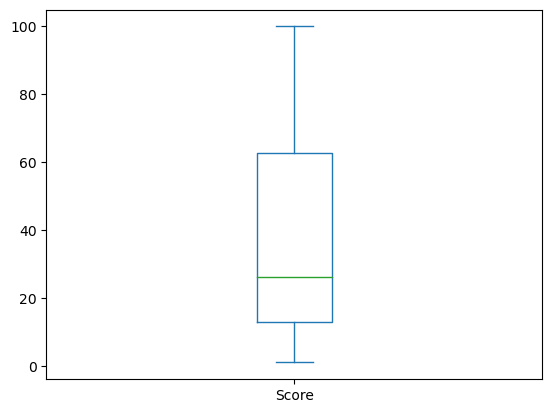

In [515]:
#getting the conversion score from probabilities
y_pred_final["Score"] = y_pred_final.Conversion_Prob.apply(lambda x: x*100)
y_pred_final["Score"].plot(kind="box")

In [ ]:
### 1.Metrics Value:
The metrics for Train set and test set are:

In [ ]:
#For Train set(optimal cut-off point method):
#    Accuracy   - 0.79
#    Sensitivity - 0.82
#    Specificty - 0.78
    
#For test set:
#    Accuracy - 0.78
#    Sensitivity - 0.83
#    Specificty - 0.75
    

In [ ]:
### 2. Hot leads
#The customers who have lead_Score greater than or equal to 85 are termed as Hot leads. The lead conversion rate is very high for hot leads.

In [516]:
y_pred_final.head()

,LeadID,Converted,Conversion_Prob,final_predicted,Score
0,2761,0,0.058465,0,5.846517
1,4048,1,0.883986,1,88.398553
2,8661,0,0.134913,0,13.491318
3,1196,0,0.211902,0,21.190172
4,8217,0,0.500550,1,50.055001


In [517]:
#Adding Lead_Score to test data
y_pred_final["Lead_Score"]=y_pred_final["Conversion_Prob"].map(lambda x:round(x*100))
y_pred_final.head()
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,LeadID,Converted,Conversion_Prob,final_predicted,Score,Lead_Score
1,4048,1,0.883986,1,88.398553,88
7,5304,1,0.901949,1,90.194926,90
13,2907,1,0.940117,1,94.011710,94
14,7433,1,0.851479,1,85.147928,85
28,8859,1,0.879045,1,87.904500,88
...,...,...,...,...,...,...
2712,7178,1,0.872192,1,87.219204,87
2716,4778,0,0.917151,1,91.715103,92
2717,4197,1,0.917151,1,91.715103,92
2719,5042,1,0.898351,1,89.835083,90


In [ ]:
### 3.LeadID of the customers

In [518]:
#LeadID of the customers 
print("The LeadID of the customers are:")
LeadID=hot_leads["LeadID"].values.reshape(-1)
LeadID

The LeadID of the customers are:


array([4048, 5304, 2907, 7433, 8859, 2342, 5647, 7455, 6758, 3739, 5453,
       6939, 1897, 3421, 8053, 2665, 4807,  802,  737, 6499, 7468, 8044,
       4935, 1612, 5806, 8891, 8183, 5240, 5524, 4523, 7240, 5049, 2763,
       8027,  446, 3268, 5525, 2115,  337, 2571, 2458,  211, 5915, 5697,
       2713, 2339, 4677, 7297, 7039, 3518, 4662, 5087, 4847, 5253, 4253,
       2664, 8077, 2584, 7045, 1614, 5159, 1557, 2658, 3182, 1979, 7193,
       2457, 5803, 1578, 3299, 4525, 8681, 4223, 6158, 8888, 3045, 6822,
       7042, 4865, 2783, 3761, 2826, 3929, 2490, 5621, 6892, 6175,  373,
       2121, 7259, 7699, 3321, 3532, 2101, 6082, 7091, 6015, 2022, 6932,
       5741, 6550, 4149, 4777, 1995,  112, 8115, 6608, 8547, 7789, 2161,
       7966, 3473, 2623, 2594, 7265, 2988, 2089, 2153, 3847, 8207, 4592,
       8990, 4776, 6784, 7490, 5276, 4505, 7627, 5683, 6727, 5794,  822,
       2055, 4732, 5825, 5822, 2042, 6279, 3665,  720, 2982, 5769,  941,
       6698, 1542, 1304, 4705, 1454, 6755,  174, 72

In [ ]:
### 4. Features of the model

In [519]:
#Features and its values for the final model
parameters=logm8res.params.sort_values(ascending=False)
parameters

Lead Origin_Lead Add Form                 4.491904
Last Notable Activity_SMS Sent            1.408319
Total Time Spent on Website               1.070866
Lead Source_Olark Chat                    1.058071
TotalVisits                               0.198407
A free copy of Mastering The Interview   -0.291003
Last Notable Activity_Modified           -0.303451
Last Activity_Page Visited on Website    -0.632515
const                                    -0.968522
Last Activity_Converted to Lead          -0.970432
Do Not Email                             -1.353942
Last Activity_Olark Chat Conversation    -1.446049
dtype: float64

In [ ]:
#### We could see our model has an accuracy of 79% with 82% of sensitivity (which show's model's good ability to predict Conversion of lead which was asked by CEO to get it around 80%). 